# DSC320: Binomial Distribution and Working with Random Data

**Name**: Joseph Choi <br>
**Class**: DSC410-T301 Predictive Analytics (2243-1)

In [16]:
# Setup

import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

## 1. Using the Binomial Distribution
An ensemble model is a model that uses multiple different models to build a better model. E.g., a 
random forest classifier uses multiple decision trees to “vote” for the best answer. For this exercise, 
assume that an ensemble model uses majority vote to predict a binary target and that each individual 
model is independent of every other model. Use Python code to answer the following questions. 

**Hint**: The binom package from scipy.stats is useful for this problem, but make sure you are using 
the correct functions for your calculations. 

### (a) If an ensemble model is composed of 15 individual models that each have 63% accuracy, what is the ensemble model accuracy? 

In [2]:
"""
Code Description:
    - To calculate the ensemble model accuracy, using the bionmial distribution
    - Plan: Summing up the probabilities of getting at least half of the individual models' predictions correct via binomial distribution 
    - Why at least half of the individual models' predictions? 
        - In ensemble model predictions are determined by the most commonly predicted class among the individual's models (majority voting)
    - Provided parameters:
        - Number of individual models (n = 15)
        - Probability of success (p = 0.63)

Code Breakdown:
    - Part 1: Setting up given parameters
    - Part 2: Calculating ensemble model accuracy using binomial distribution
        - Calculating the sum of probabilities for getting at least half of the individual models' predictions correct
        - "for k in range((n + 1) // 2, n + 1)": 
            - Iterating over values of k from half of the number of individual models rounded down to the nearest integer to the total number of individual models
            - Range represents the possible number of successful predictions (from at least half to all)
        - "binom.pmf(k, n, p)": Calculating the probability mass function (pmf) of the binomial distribution for each value of k
            - k: Number of successful predictions
            - n: Number of individual models
            - p: Probability of success
        - "sum()": Sums up probabilities calculated for each value of k
    - Part 3: Printing output
"""

# Part 1:
n = 15  
p = 0.63  

# Part 2:
ensemble_accuracy = sum(binom.pmf(k, n, p) for k in range((n + 1) // 2, n + 1))

# Part 3:
ensemble_accuracy

0.8512830492077245

#### Output Interpretation:
- The ensemble model is expected have an accuracy of of ~85.13%
- Important to note that an ensemble model conbines the predictions of multiple individual models using majority voting

### (b) What would the accuracy of the 15 individual models need to be in order for the ensemble model to have 95% accuracy? Find the smallest whole number percentage so this is satisfied. 

In [8]:
"""
Code Description:
    - To determine the accuracy required for individual models to achieve a target ensemble accuracy using the binomial distribution
    - Plan: Find the minimum whole number percentage accuracy needed for individual models to ensure the ensemble model achieves a specified target accuracy
    - Provided parameters:
        - Number of individual models (n = 15)
        - Target ensemble accuracy (target_ensemble_accuracy = 0.95)

Code Breakdown:
    - Part 1: Setting up given parameters
    - Part 2: Iterating over possible individual model accuracies (from 1% to 100%) via "range(1, 101)"
        - For each accuracy, convert it to a probability (percentage divided by 100)
    - Part 3: Calculating ensemble accuracy using binomial distribution by summing up the probabilities for getting at least half of the individual models' predictions correct via "sum(binom.pmf(...)"
    - Part 4: Iterating until the ensemble accuracy meets or exceeds the target accuracy (check if ensemble accuracy meets the target)
        - If the target accuracy is met or exceeded, print out the accuracy of individual models needed to achieve the ensemble target accuracy and terminate the loop
"""

# Part 1:
n = 15  
target_ensemble_accuracy1 = 0.95 

# Part 2:
for individual_accuracy1 in range(1, 101):  
    p = individual_accuracy1 / 100  

    # Part 3:
    ensemble_accuracy = sum(binom.pmf(k, n, p) for k in range((n + 1) // 2, n + 1))

    # Part 4:
    if ensemble_accuracy >= target_ensemble_accuracy1:
        print("Accuracy for 95% ensemble accuracy:", individual_accuracy1)
        break

Accuracy for 95% ensemble accuracy: 71


### (c) If each individual model has 63% accuracy, how many individual models are needed for the ensemble model to have 95% accuracy? Find the smallest odd number of models (so there is a clear majority), so that this is satisfied.

In [7]:
"""
Code Description:
    - To determine the minimum number of individual models needed for the ensemble model to achieve a target accuracy using the binomial distribution
    - Plan: Find the smallest odd number of models that results in the ensemble model having an accuracy of at least 95%
    - Provided parameters:
        - Accuracy of each model (individual_accuracy = 0.63)
        - Target ensemble accuracy (target_ensemble_accuracy = 0.95)

Code Breakdown:
    - Part 1: Setting up given parameters
    - Part 2: Iterating over possible numbers of individual models (starting from 1, incrementing by 2 for odd numbers) via "range(1, 101, 2)"
        - Part 3: For each number of models, calculating the ensemble accuracy using the binomial distribution via "sum(binom.pmf(...)"
        - Part 4: Iterating until the ensemble accuracy meets or exceeds the target accuracy
            - If the target accuracy is met or exceeded, print out the number of individual models needed to achieve the ensemble target accuracy and terminate the loop
"""

# Part 1:
individual_accuracy2 = 0.63  
target_ensemble_accuracy2 = 0.95

# Part 2:
for num_models in range(1, 101, 2):
    
    # Part 3:
    ensemble_accuracy = sum(binom.pmf(k, num_models, individual_accuracy2) for k in range((num_models + 1) // 2, num_models + 1))
    
    # Part 4:
    if ensemble_accuracy >= target_ensemble_accuracy2:
        print("Number of individual models needed for 95% ensemble accuracy:", num_models)
        break

Number of individual models needed for 95% ensemble accuracy: 39


## 2. Working with Random Data
Suppose that a random variable X can take on values 1, 2, 3, 4, or 5.

**Note**: You can combine as much as you like of parts (b) and (c) into a single function. They are 
separate in the problem statement to make sure what you need to do is clear.

### (a) Make up your own probability mass function (pmf) for X. Make sure it satisfies the requirements of a pmf. 

In [5]:
"""
Code Description:
    - Creating own pmf that satisfies pmf requirements
    - pmf must satisfy two requirements:
        - Each probability must be non-negative
        - Sum of all probabilities must equal 1 
        
Code Breakdown:
    - Part 1: Defining the pmf for the variable X
        - Using dictionary where: 
            - Keys are values of X
            - Values are the probabilities
    - Part 2: Checking if the pmf satisfies the requirements
    - Part 3: Checking if each probability is non-negative by iterating over the probabilities
    - Part 4: Checking if the sum of all probabilities equals 1 by calculatubg the sum of all probabilities and comparing it to 1
    - Part 3-4: Providing feedback based on the checks
"""

# Part 1:
pmf_X = {
    1: 0.2,
    2: 0.3,
    3: 0.1,
    4: 0.2,
    5: 0.2
}

# Part 2:

# Part 3:
if all(prob >= 0 for prob in pmf_X.values()):
    print("1. There are no negatives so they satisfy pmf requirements")
else:
    print("Does not satisfy pmf requirements")

# Part 4:
if sum(pmf_X.values()) == 1:
    print("2. Sum of all probabilities must equal 1 so they satisfy requirments")
else:
    print("Does not satisfy pmf requirements")

1. There are no negatives so they satisfy pmf requirements
2. Sum of all probabilities must equal 1 so they satisfy requirments


### (b) Build a function that will generate 50 random X-values from the pmf you created in part (a) and return the mean of these values. 

In [6]:
"""
Code Description:
    - Building a function to generate random X-values based on a provided pmf and return the mean of these values
    - Function's two parameters:
        - pmf (probability mass function)
        - num_samples (number of random samples to generate)
    - After generating random X-values based on the pmf, the function calculates the mean of these values and returns it

Code Breakdown:
    - Part 1: Building the function generate_X that takes in two parameters (pmf & num_samples)
    - Part 2: Generating random X-values based on the provided pmf
        - Using "random.choice()" to generate random X-values from the keys of the pmf with probabilities specified by the values of the pmf
        - "list(pmf.keys()): pmf.keys()": Returns the keys (possible values of the random variable X) from the pmf dictionary
        - "size=num_samples": Specifies the number of samples to generates (value of 'num_samples')
        - "p=list(pmf.values())": Specifies the probabilities associated with eachvalue in the 'pmf.keys()' list
    - Part 3: Calculating the mean of the generated X-values
        - Using "mean()" to calculate the mean of the generated X-values
    - Part 4: Returning the calculated mean of the generated X-values
    - Part 5: generate_X is deployed with "pmf_X" and 50 as the number of samples
        - Mean of the generated random X-values is printed out as output
"""

# Part 1: 
def generate_X(pmf, num_samples):

    # Part 2:
    X_values = np.random.choice( # Generating random X-values based on pmf
        list(pmf.keys()), # List of possible values (keys of pmf)
        size=num_samples, # Number of samples to generate
        p=list(pmf.values()) # Probabilities associated with each value
    )
    
    # Part 3:
    mean_X = np.mean(X_values)
    
    # Part 4:
    return mean_X

# Part 5:
mean_X_values = generate_X(pmf_X, 50)
print("Mean:", mean_X_values)

Mean: 2.94


### (c) Now, build a function that will run your function in part b, 1,000 times and store the means in a list.

In [14]:
"""
Code Description:
    - Building a function to run the generate_X 1,000 times and storing the means in a list
        - Iterating 1,000 times, generating random X-values each time and calculating their mean
        - Storing mean outputs in a list and returned

Code Breakdown:
    - Part 1: Defining the function "generate_X_1000" which takes in parameters (pmf, num_samples)
    - Part 2: Initializing an empty list to store the means of each iteration
    - Part 3: Iterating 1,000 times via "range(1000)": 
        - Inside the loop, generating X-values using the "generate_X" and calculating their mean
        - Appending the mean to the list of means via "append()"
    - Part 4: Returning the list of means containing the means of all iterations
    - Part 5: Calling the generate_X_1000 function with pmf_X and 50 as the number of samples (same parameters as b)
    - Part 6: Printing out the first 10 means from the list
"""

# Part 1:
def generate_X_1000(pmf, num_samples):
    
    # Part 2:
    means_list = []
    
    # Part 3:
    for _ in range(1000):
        mean_X = generate_X(pmf, num_samples) 
        means_list.append(mean_X) 
        
    # Part 4:
    return means_list

# Part 5:
means = generate_X_1000(pmf_X, 50) 

# Part 6:
means[:10]

[2.78, 2.84, 2.8, 2.76, 2.98, 3.32, 2.52, 2.58, 3.22, 2.78]

### (d) Create a histogram of the means in the list from part c. Describe the shape of this histogram. What theorem tells us that it will look the way it does? 

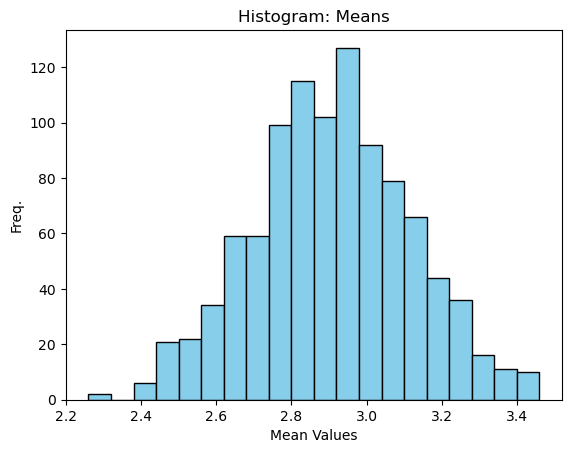

In [17]:
"""
Code Description:
    - Creating a histogram to visualize the distribution using "means" list from (c) 
"""

# Histogram:
plt.hist(means, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram: Means')  
plt.xlabel('Mean Values') 
plt.ylabel('Freq.')  
plt.show() 

#### Response:
The shape of the histogram looks like a bell-shaped curve. This indicates that it is a normal distribution. This aligns with CLT as it describes that as the sample size increases, the distribution of sample means tends to approach a normal distribution. Therefore, the histogram shows a bell shape as expected by the CLT. 

### (e) What is the mean and standard deviation of your list of means? What are their theoretical values? 

In [19]:
# Calculating the mean and std of the list of means via "mean()" & "std()"
mean = np.mean(means)
std = np.std(means)

In [20]:
# Printing the mean
mean

2.8983199999999996

In [21]:
# Printing the std
std

0.20961196912390284

#### Response:
The theoretical values for the mean of the list of "means" should be close to the population mean. This was calculated in (b) as **2.94**. Therefore, the mean output of **2.90** is in line with the theoretical expectation.